# Imports

In [9]:
try:
    import arviz as az
except ModuleNotFoundError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet arviz)"
    pass

try:
    import graphviz
except ModuleNotFoundError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet graphviz)"
    pass

## Print config

In [24]:
!python --version

!uname -a

#
import numpy as np
print("numpy version=", np.__version__)

#
import pymc as pm
print("pymc3 version=", pm.__version__)

import matplotlib
print("matplotlib version=", matplotlib.__version__)

#
import arviz as az
print("arviz version=", az.__version__)

#
import graphviz
print("graphviz version=", graphviz.__version__)

Python 3.12.3
Linux 78f731e61420 6.6.22-linuxkit #1 SMP Fri Mar 29 12:21:27 UTC 2024 aarch64 aarch64 aarch64 GNU/Linux
numpy version= 1.26.4
pymc3 version= 5.16.2
matplotlib version= 3.9.2
arviz version= 0.19.0
graphviz version= 0.20.3


In [29]:
plt.rcParams['figure.figsize'] = [8, 3]

From https://python.arviz.org/en/latest/index.html

- ArviZ is a package for exploratory analysis of Bayesian models.
- It is backend agnostic (e.g., PyStan, PyMC, raw `numpy` arrays)

# Getting Started

From https://python.arviz.org/en/latest/getting_started/index.html#

## ArviZ quickstart

https://python.arviz.org/en/latest/getting_started/Introduction.html

### Get started with plotting

vals.shape= (100000,)
vals= [ 0.49671415 -0.1382643   0.64768854 ...  0.40918508 -0.21109167
  0.12006294]


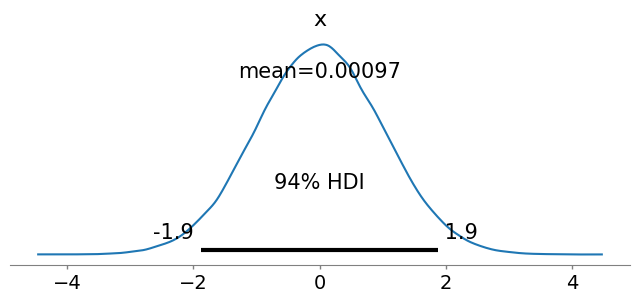

In [30]:
# - Plot a distribution with some info about HDI (highest density interval).

# Sample a Gaussian.
np.random.seed(42)
vals = np.random.randn(100_000)
print("vals.shape=", vals.shape)
print("vals=", vals)

# Plot PDF.
az.plot_posterior(vals);

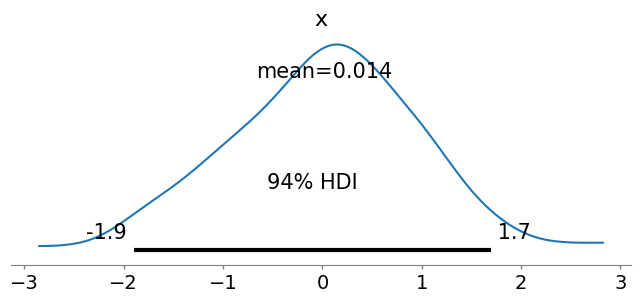

In [39]:
# `arviz` interprets a 2d array as "chain x draws".
# Build 10 chains and 50 draws each.
size = (10, 50)
vals = np.random.randn(*size)

# When plotting all the samples are flattened.
az.plot_posterior(vals);

In [15]:
import warnings
# /venv/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being
# removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
# for _, sub_data in grouped_datum:
# warnings.filterwarnings("error", category=FutureWarning, message="Series.__getitem__")

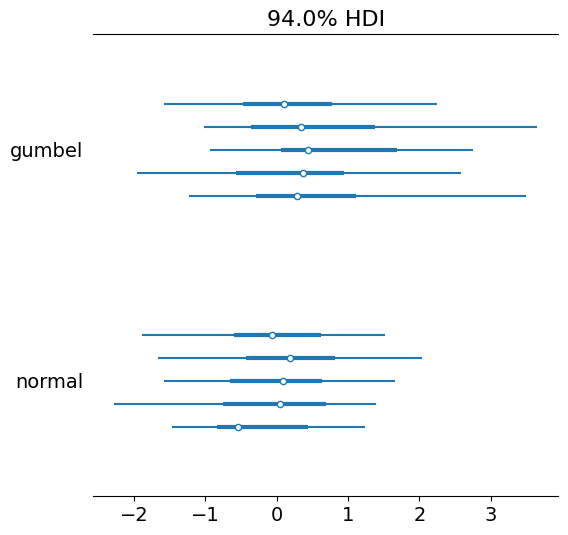

In [40]:
size = (5, 50)

# A dict is interpreted as multiple random vars, each with different "chains x draws".
data = {
    "normal": np.random.randn(*size),
    "gumbel": np.random.gumbel(size=size),
    #"student t": np.random.standard_t(df=6, size=size),
    #"exponential": np.random.exponential(size=size),
}
az.plot_forest(data);
# There are several RVs, each with 5 realizations, each realization with 50 samples.

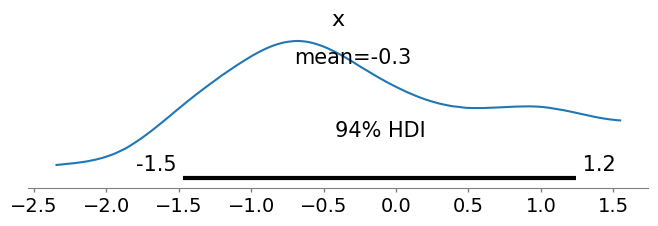

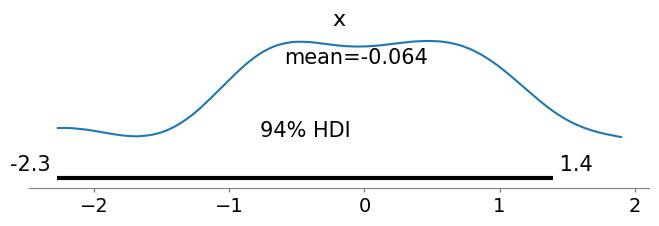

In [45]:
az.plot_posterior(data["normal"][0])
az.plot_posterior(data["normal"][1]);

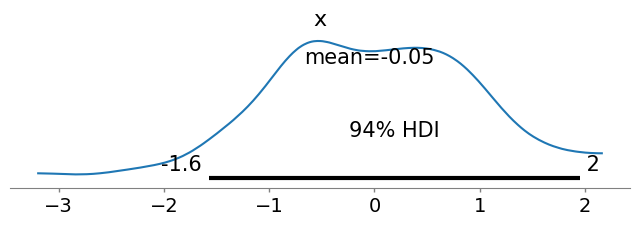

In [47]:
# data["normal"] is a 10 chains x 50 samples, but when plotting all the data is concat.
az.plot_posterior(data["normal"]);

### PyMC integration

### InferenceData

From https://python.arviz.org/en/latest/getting_started/Introduction.html#convert-to-inferencedata

The object returned by most PyMC sampling methods is `arviz.InferenceData`.

In [51]:
# 8 school examples
# - there are 8 schools (each with a name)
# -

J = 8
# Observations.
# - Mean (unknown).
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
# - Std dev (is known).
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

schools = np.array(
    [
        "Choate",
        "Deerfield",
        "Phillips Andover",
        "Phillips Exeter",
        "Hotchkiss",
        "Lawrenceville",
        "St. Paul's",
        "Mt. Hermon",
    ]
)

# with pm.Model() as centered_eight:
#    # 8 normal RVs for the mean.
#    mu = pm.Normal("mu", mu=0, sigma=5)
#    tau = pm.HalfCauchy("tau", beta=5)
#    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
#    # The observed data has:
#    # - random means and
#    # - known std dev.
#    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
#    # This pattern is useful in PyMC3.
#    #prior = pm.sample_prior_predictive()
#    # Sample the posterior.
#    centered_eight_trace = pm.sample(
#        # Return data as arviz.InferenceData instead of MultiTrace.
#        return_inferencedata=False)
#    posterior_predictive = pm.sample_posterior_predictive(centered_eight_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [obs]


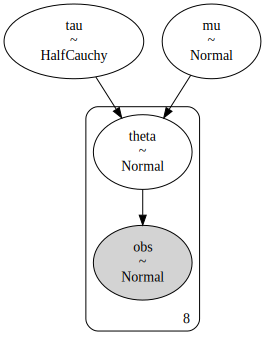

In [34]:
# pm.model_to_graphviz(centered_eight)

- Most ArviZ functions accept `trace` objects.
- It can be converted into `InferenceData`

In [55]:
# print(type(centered_eight))
# print(centered_eight)

# print(type(centered_eight_trace))
# print(centered_eight_trace)

In [54]:
with pm.Model(coords={"school": schools}) as centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, dims="school")
    pm.Normal("obs", mu=theta, sigma=sigma, observed=y, dims="school")

    # This pattern can be useful in PyMC
    idata = pm.sample_prior_predictive()
    idata.extend(pm.sample())
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [mu, obs, tau, theta]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [obs]


In [56]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [36]:
az.plot_autocorr(centered_eight_trace)

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not MultiTrace

In [38]:
# Build the inference data from PyMC3 run.
data = az.from_pymc(
    trace=centered_eight_trace,
    prior=prior,
    posterior_predictive=posterior_predictive,
    model=centered_eight,
    coords={"school": schools},
    dims={"theta": ["school"], "obs": ["school"]},
)
data

AttributeError: module 'arviz' has no attribute 'from_pymc'

## Introduction to xarray, InferenceData, netCDF

https://python.arviz.org/en/latest/getting_started/XarrayforArviZ.html

There are several data structures that `ArviZ` relies on:
- NumPy arrays
- xarray.Dataset
- arviz.InferenceData
- netCDF

Bayesian inference generates numerous datasets:
- Prior / posterior distribution for N variables
- Observed data
- Prior / posterior predictive distribution
- Trace data for each inference run
- Sample statistics for each inference run

Data from probabilistic programming is high-dimensional
- Use `xarray` to store high-dimensional data with human readable dimensions and coordinates

Different Bayesian modeling libraries (e.g., PyMC3, Pyro, PyStan) generate data in different formats

In [54]:
print(az.list_datasets()[:1000])

centered_eight
A centered parameterization of the eight schools model. Provided as an example of a model that NUTS has trouble fitting. Compare to `non_centered_eight`.

The eight schools model is a hierarchical model used for an analysis of the effectiveness of classes that were designed to improve students' performance on the Scholastic Aptitude Test.

See Bayesian Data Analysis (Gelman et. al.) for more details.

local: /venv/lib/python3.12/site-packages/arviz/data/example_data/data/centered_eight.nc

----------

non_centered_eight
A non-centered parameterization of the eight schools model. This is a hierarchical model where sampling problems may be fixed by a non-centered parametrization. Compare to `centered_eight`.

The eight schools model is a hierarchical model used for an analysis of the effectiveness of classes that were designed to improve students' performance on the Scholastic Aptitude Test.

See Bayesian Data Analysis (Gelman et. al.) for


In [56]:
# From Bayesian Data Analysis, section 5.5 (Gelman et al. 2013):

# Analyze the effects of special coaching programs for SAT-V (Scholastic Aptitude Test-Verbal) in each of eight high schools.
# - The outcome variable in each study was the score on a special administration of the SAT-V
# - the scores can vary between 200 and 800, with mean about 500 and standard deviation about 100

In [55]:
data = az.load_arviz_data("centered_eight")
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

- There are multiple datasets (e.g., posterior, prior, observed data)
- Each dataset is a `xarray.Dataset`
    - There are 8 schools
    - There are 3 variables (mu, theta, tau)
    - 4 chains
    - Each chain has 500 draws

- Each dataset has different sizes, so we can't store them in a single xarray

In [59]:
# Print prior.
data.prior

<xarray.Dataset> Size: 45kB
Dimensions:  (chain: 1, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 8B 0
  * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
Data variables:
    tau      (chain, draw) float64 4kB ...
    theta    (chain, draw, school) float64 32kB ...
    mu       (chain, draw) float64 4kB ...
Attributes:
    arviz_version:              0.13.0.dev0
    created_at:                 2022-10-13T14:37:26.602116
    inference_library:          pymc
    inference_library_version:  4.2.2

In [60]:
# Print one dataset.
data.observed_data

<xarray.Dataset> Size: 576B
Dimensions:  (school: 8)
Coordinates:
  * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
Data variables:
    obs      (school) float64 64B ...
Attributes:
    arviz_version:              0.13.0.dev0
    created_at:                 2022-10-13T14:37:26.606375
    inference_library:          pymc
    inference_library_version:  4.2.2

### netCDF

- `arviz.InferenceData` and `xarray.Dataset` store data in memory
- netCDF is a standard for serializing array oriented files
    - netCDF corresponds to a `arviz.InferenceData`

## Creating InferenceData

https://python.arviz.org/en/latest/getting_started/CreatingInferenceData.html

- `arviz.InferenceData` is the central format of Arviz
- It is a container that maintains references to one or more `xarray.Dataset`

In [61]:
# Build from 1D numpy array
size = 100
data = np.random.randn(size)
dataset = az.convert_to_inference_data(data)
dataset

Inference data with groups:
	> posterior

In [68]:
# Build from nD numpy array
shape = (1, 2, 3, 4, 5)
data = np.random.randn(*shape)
print("data.shape=", data.shape)
dataset = az.convert_to_inference_data(data)
dataset


data.shape= (1, 2, 3, 4, 5)


Inference data with groups:
	> posterior

The 5 dimensions are interpreted as "chain", "draw" and the rests are dimensions of the data

InferenceData can also be built from dictionary and pd.DataFrame

In [89]:
# Build from PyMC.

import pymc as pm

draws = 500
chains = 2
data = {
    "J": 8,
    "y": np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0]),
    "sigma": np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0]),
}

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_tilde", mu=0, sigma=1, shape=data["J"])
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    pm.Normal("obs", mu=theta, sigma=data["sigma"], observed=data["y"])
    #
    idata = pm.sample(draws, chains=chains)
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)
    #prior = pm.sample_prior_predictive()
    #posterior_predictive = pm.sample_posterior_predictive(trace)

    # pm_data = az.from_pymc3(
    #     trace=trace,
    #     prior=prior,
    #     posterior_predictive=posterior_predictive,
    #     coords={"school": np.arange(data["J"])},
    #     dims={"theta": ["school"], "theta_tilde": ["school"]})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, tau, theta_tilde]


Output()

Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [obs]


Output()

In [90]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

## Working with InferenceData

https://python.arviz.org/en/latest/getting_started/WorkingWithInferenceData.html

In [91]:
# Combine chains and draws.
stacked = az.extract(idata)
stacked

<xarray.Dataset> Size: 168kB
Dimensions:            (sample: 1000, theta_dim_0: 8, theta_tilde_dim_0: 8)
Coordinates:
  * theta_dim_0        (theta_dim_0) int64 64B 0 1 2 3 4 5 6 7
  * theta_tilde_dim_0  (theta_tilde_dim_0) int64 64B 0 1 2 3 4 5 6 7
  * sample             (sample) object 8kB MultiIndex
  * chain              (sample) int64 8kB 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
  * draw               (sample) int64 8kB 0 1 2 3 4 5 ... 495 496 497 498 499
Data variables:
    mu                 (sample) float64 8kB 5.854 4.57 3.066 ... 2.929 0.818
    tau                (sample) float64 8kB 11.98 0.7126 3.374 ... 3.529 8.578
    theta              (theta_dim_0, sample) float64 64kB 14.82 4.814 ... -6.138
    theta_tilde        (theta_tilde_dim_0, sample) float64 64kB 0.748 ... -0.811
Attributes:
    created_at:                 2024-08-30T19:14:17.004326+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2
    sampling_time:              0.8099370002746582
    tuning_steps:               1000

In [98]:
# Extract a NumPy array for a param.
stacked.mu.values[:10]

array([ 5.85416171,  4.56964056,  3.06585315,  4.5206111 ,  5.4921385 ,
        5.67251551,  1.52179431,  1.40516149, 11.3686218 , -3.14945078])

In [101]:
idata.observed_data

<xarray.Dataset> Size: 128B
Dimensions:    (obs_dim_0: 8)
Coordinates:
  * obs_dim_0  (obs_dim_0) int64 64B 0 1 2 3 4 5 6 7
Data variables:
    obs        (obs_dim_0) float64 64B 28.0 8.0 -3.0 7.0 -1.0 1.0 18.0 12.0
Attributes:
    created_at:                 2024-08-30T19:14:17.018223+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2

# Example gallery

https://python.arviz.org/en/latest/examples/index.html

# User guide

## Plotting

https://python.arviz.org/en/latest/user_guide/plotting.html

## Data structures

https://python.arviz.org/en/latest/user_guide/data_structures.html

### Label guide

https://python.arviz.org/en/latest/user_guide/label_guide.html

### InferenceData schema

https://python.arviz.org/en/latest/schema/schema.html#schema

## Computation

https://python.arviz.org/en/latest/user_guide/computation.html

## Sampling wrappers

https://python.arviz.org/en/latest/user_guide/sampling_wrappers.html